# UCI regression eval

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
path_base = "./results"
experiment_names = [f for f in os.listdir(path_base) if "-target" in f]
experiment_names

['kin8nm-target.pkl',
 'bostonHousing-target.pkl',
 'naval-propulsion-plant-target.pkl',
 'power-plant-target.pkl',
 'wine-quality-red-target.pkl',
 'yacht-target.pkl',
 'protein-tertiary-structure-target.pkl',
 'energy-target.pkl',
 'concrete-target.pkl']

In [4]:
df_results_all = []
for file_name in experiment_names:
    dataset = file_name.replace("-target.pkl", "")
    path = os.path.join(path_base, file_name)
    with open(path, "rb") as f:
        experiment = pickle.load(f)

    errors = experiment["methods"]

    df_results = pd.DataFrame({
        name: errors[name].median(axis=0)
        for name in errors
    })

    df_results = df_results.melt()
    df_results["dataset"] = dataset
    df_results_all.append(df_results)

df_results_all = pd.concat(df_results_all, axis=0)

# Root median squared error
df_results_all["value"] = np.sqrt(df_results_all["value"])
df_results_all["dataset"] = df_results_all["dataset"].str.replace("-.*", "", regex=True).str.capitalize()

In [5]:
def format_entry(entry):
    mean = entry.mean()
    std = entry.std()
    if std > 1000:
        label = rf"$-$"
    else:
        label = rf"${mean:0.3f} \pm {std:0.3f}$"
    return label

In [6]:
res = (
    df_results_all
    .pivot_table(index="variable", columns="dataset", values="value", aggfunc=format_entry)
)
res

dataset,Bostonhousing,Concrete,Energy,Kin8nm,Naval,Power,Protein,Wine,Yacht
variable,,,,,,,,,
E-ANN-1,$0.057 \pm 0.006$,$0.084 \pm 0.009$,$0.040 \pm 0.003$,$0.090 \pm 0.017$,$-$,$0.050 \pm 0.006$,$0.204 \pm 0.009$,$0.103 \pm 0.023$,$0.401 \pm 2.431$
EKF,$0.864 \pm 0.272$,$1.323 \pm 0.435$,$0.835 \pm 0.215$,$0.637 \pm 0.155$,$0.466 \pm 0.081$,$0.396 \pm 0.078$,$0.408 \pm 0.059$,$0.688 \pm 0.194$,$1.616 \pm 0.822$
OGD,$0.384 \pm 0.102$,$0.398 \pm 0.066$,$0.427 \pm 0.116$,$0.324 \pm 0.018$,$0.434 \pm 0.034$,$0.387 \pm 0.018$,$0.409 \pm 0.019$,$0.292 \pm 0.047$,$0.367 \pm 0.135$
WLF-IMQ,$0.069 \pm 0.006$,$0.089 \pm 0.010$,$0.044 \pm 0.003$,$0.089 \pm 0.004$,$0.160 \pm 0.006$,$0.048 \pm 0.001$,$0.191 \pm 0.002$,$0.102 \pm 0.014$,$0.119 \pm 0.021$
WLF-MD,$0.066 \pm 0.006$,$0.087 \pm 0.009$,$0.040 \pm 0.002$,$0.084 \pm 0.004$,$0.106 \pm 0.006$,$0.047 \pm 0.001$,$0.180 \pm 0.002$,$0.100 \pm 0.015$,$0.118 \pm 0.024$


In [7]:
print(res.T.style.to_latex(hrules=True).replace("_", "-"))

\begin{tabular}{llllll}
\toprule
variable & E-ANN-1 & EKF & OGD & WLF-IMQ & WLF-MD \\
dataset &  &  &  &  &  \\
\midrule
Bostonhousing & $0.057 \pm 0.006$ & $0.864 \pm 0.272$ & $0.384 \pm 0.102$ & $0.069 \pm 0.006$ & $0.066 \pm 0.006$ \\
Concrete & $0.084 \pm 0.009$ & $1.323 \pm 0.435$ & $0.398 \pm 0.066$ & $0.089 \pm 0.010$ & $0.087 \pm 0.009$ \\
Energy & $0.040 \pm 0.003$ & $0.835 \pm 0.215$ & $0.427 \pm 0.116$ & $0.044 \pm 0.003$ & $0.040 \pm 0.002$ \\
Kin8nm & $0.090 \pm 0.017$ & $0.637 \pm 0.155$ & $0.324 \pm 0.018$ & $0.089 \pm 0.004$ & $0.084 \pm 0.004$ \\
Naval & $-$ & $0.466 \pm 0.081$ & $0.434 \pm 0.034$ & $0.160 \pm 0.006$ & $0.106 \pm 0.006$ \\
Power & $0.050 \pm 0.006$ & $0.396 \pm 0.078$ & $0.387 \pm 0.018$ & $0.048 \pm 0.001$ & $0.047 \pm 0.001$ \\
Protein & $0.204 \pm 0.009$ & $0.408 \pm 0.059$ & $0.409 \pm 0.019$ & $0.191 \pm 0.002$ & $0.180 \pm 0.002$ \\
Wine & $0.103 \pm 0.023$ & $0.688 \pm 0.194$ & $0.292 \pm 0.047$ & $0.102 \pm 0.014$ & $0.100 \pm 0.015$ \\
Yacht &

## Experiments

In [14]:
experiment_names

['kin8nm-target.pkl',
 'bostonHousing-target.pkl',
 'naval-propulsion-plant-target.pkl',
 'power-plant-target.pkl',
 'wine-quality-red-target.pkl',
 'yacht-target.pkl',
 'protein-tertiary-structure-target.pkl',
 'energy-target.pkl',
 'concrete-target.pkl']

In [31]:
file_name = "power-plant-target.pkl"
file_name = "naval-propulsion-plant-target.pkl"
dataset = file_name.replace("-target.pkl", "")
path = os.path.join(path_base, file_name)
with open(path, "rb") as f:
    experiment = pickle.load(f)

errors = experiment["methods"]

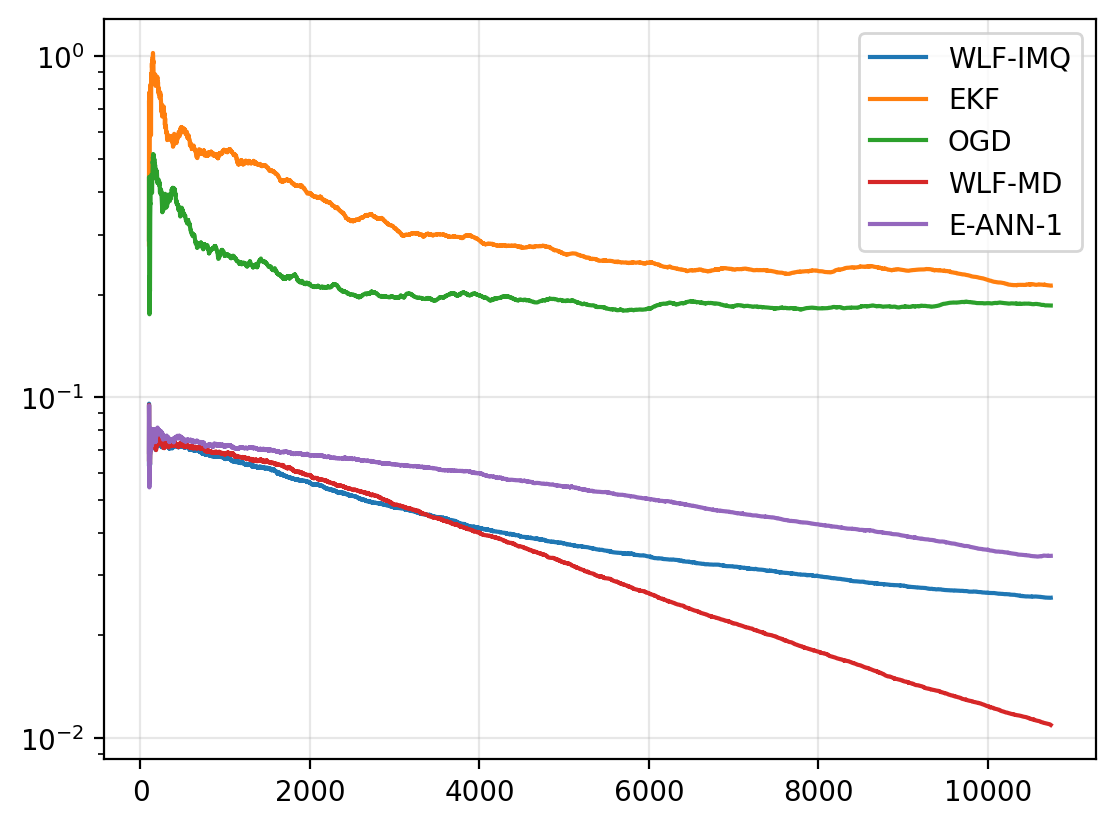

In [33]:
for method in errors:
    errors[method][100:].expanding().median().median(axis=1).plot(label=method)
    plt.yscale("log")
    plt.legend()
    plt.grid(alpha=0.3)